In [9]:
import numpy as np
import pandas as pd
import dataset
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import model
from helpers_train import *
import matplotlib.pyplot as plt


In [10]:
model = load_model("output/model_test.pt")

In [11]:
testSet = DataLoader(
    JetDataSet("processed_data/debug_test.h5", "test"),
    batch_size=100
)

Added start token. New bins are now: [41, 31, 31]
Added stop token. New bins are now: [42, 32, 32]


In [12]:
probabilities = np.array([])

for x in testSet:
    
    logits = model.forward(x)
    probs = model.probability(logits, x, logarithmic= True, topk = 5000)

    probabilities = np.append(probabilities, probs.detach().numpy())

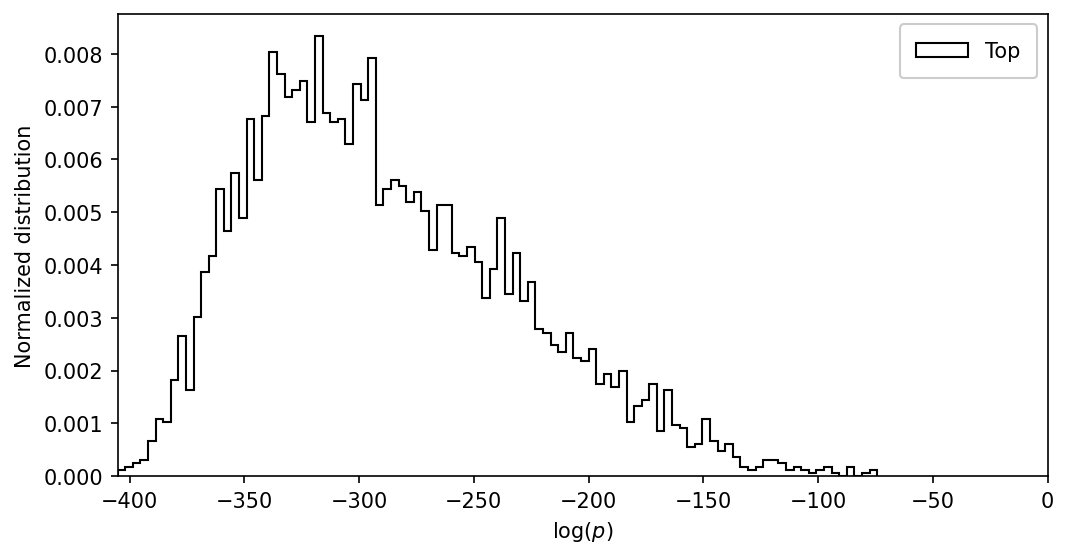

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4), dpi = 150)

ax.hist(
    probabilities,
    bins=100,                 # adjust for smoothness
    density=True,            # normalization
    histtype="step",
    linewidth=1.0,
    color="black",
    label="Top"
)

# axis labels
ax.set_xlabel(r"$\log(p)$")
ax.set_ylabel("Normalized distribution")
ax.set_title("Top")

# ticks and frame styling
#ax.tick_params(axis="both", which="major", labelsize=14, width=1.8, length=7)
#for spine in ax.spines.values():
#    spine.set_linewidth(1.8)

# legend in upper-left with box
ax.legend(
    #loc="upper left",
    frameon=True,
    framealpha=1.0,
    #fontsize=18,
    borderpad=0.8,
    handlelength=2.5
)

# optional: match x-range style from example
ax.set_xlim(probabilities.min(), 0)

#plt.tight_layout()
plt.show()